# Bike Sharing Assignment

### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
• Which variables are significant in predicting the demand for shared bikes.
• How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Solution Approach
<pre>
1. Understanding/visualizing, evaluating and preparing data (using appropriate categorical variables and dummy variables; with modification where needed); EDA principles applied
2. Building the model
a. splitting the data into training and test data sets
b. rescaling the features if/as needed
c. feature selection using R-Sqaure and VIF values (RFE and Statsmodel combination to be used)
3. Perform residual analysis and predictions


### Importing necessary libraries for processing

In [105]:
# For analysis and numerical functions
import pandas as pd
import numpy as np

# For Vizualization
import seaborn as sns
import matplotlib.pyplot as plt

# for suppressing warning
import warnings
warnings.filterwarnings(action='ignore')

In [211]:
#for splitting into train and test subsets
from sklearn.model_selectionelection import train_test_split

In [216]:
#for scaling data
from sklearn.preprocessing import MinMaxScaler

In [229]:
# for model building using RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [285]:
# for model building using statsmodel
import statsmodels.api as sm  

In [293]:
# for VIF checks
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [507]:
#for R-square
from sklearn.metrics import r2_score

### Loading provided dataset

In [179]:
df=pd.read_csv("day.csv")

##### checking basic data charateristics

In [180]:
#initial few records with column names and data
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [181]:
#rows and columns
df.shape

(730, 16)

In [41]:
#column data types
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [42]:
#rows, columns and values
df.info

<bound method DataFrame.info of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windspee

In [54]:
#check for unique values
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [ ]:
#yr, holiday, workingday have only two values. Need not create dummy variables for them; 
#dummy variables for other categorical variables to be created subsequently (season, mnth, weekday, weathersit)

In [44]:
#check for nulls
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [31]:
#no null or missing values

In [182]:
#Checking for duplicate using a temporary dataframe

dfduplicate = df
dfduplicate.drop_duplicates(subset = None, inplace = None)

#now check if any duplicates were actually dropped
dfduplicate.shape

(730, 16)

In [35]:
#no rows deleted, hence no duplicates in data

In [ ]:
#instant and dteday appear to have all unique values; instant appears to be just an index; 
#dteday doesnt appear to be adding significance considering all unique values;
#from data provided and data distionary, it can be concluded that meaningful information of month and year are 
#provided separately in yr and mnth

In [ ]:
#casual and registered dropped as features
#cursory look at casual, registered, cnt indicates that cnt is a sum of casual and registered; 
#check if this indeed is the case for all records

In [56]:
for i in range(len(df)):
    if ((df.loc[i,"cnt"]-df.loc[i,"casual"]-df.loc[i,"registered"])!=0):
        print("Difference found")

In [ ]:
#no difference found, hence it can be safely concluded that cnt is sum of casual and registered 


In [12]:
'''
#confirm statistically if sum of casual and registered is strongly correlated with cnt
dfchecksum = df[['casual', 'registered', 'cnt']]

dfchecksum['sum'] = df['casual'] + df['registered']


plt.figure(figsize = (5, 5))
sns.heatmap(dfchecksum.corr(), annot = True)
plt.show()
#sum and cnt have positive correlation of 1, hence sum i.e. casual and registered can be dropped
'''


"\n#confirm statistically if sum of casual and registered is strongly correlated with cnt\ndfchecksum = df[['casual', 'registered', 'cnt']]\n\ndfchecksum['sum'] = df['casual'] + df['registered']\n\n\nplt.figure(figsize = (5, 5))\nsns.heatmap(dfchecksum.corr(), annot = True)\nplt.show()\n#sum and cnt have positive correlation of 1, hence sum i.e. casual and registered can be dropped\n"

In [13]:
'''
dfchecksum = df[['casual', 'registered', 'cnt']]

dfchecksum['div'] = df['casual']/df['registered']


plt.figure(figsize = (5, 5))
sns.heatmap(dfchecksum.corr(), annot = True)
plt.show()
'''


"\ndfchecksum = df[['casual', 'registered', 'cnt']]\n\ndfchecksum['div'] = df['casual']/df['registered']\n\n\nplt.figure(figsize = (5, 5))\nsns.heatmap(dfchecksum.corr(), annot = True)\nplt.show()\n"

In [30]:
'''
dfchecksum = df[['casual', 'registered', 'cnt']]


plt.figure(figsize = (5, 5))
sns.heatmap(dfchecksum.corr(), annot = True)
plt.show()
'''

"\ndfchecksum = df[['casual', 'registered', 'cnt']]\n\n\nplt.figure(figsize = (5, 5))\nsns.heatmap(dfchecksum.corr(), annot = True)\nplt.show()\n"

### Data Cleansing

In [91]:
##Dropping non-value adding columns


In [415]:
dfnew = df.copy()

In [416]:
dfnew.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [417]:
dfnew.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)

In [418]:
dfnew.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [419]:
##converting columns to categorical type where necessary

In [420]:
dfnew.season.replace((1,2,3,4), ('Spring', 'Summer', 'Fall', 'Winter'), inplace = True)
dfnew.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
dfnew.weathersit.replace((1,2,3,4), ('Clear','Misty','Light','Heavy'), inplace=True)
dfnew.weekday.replace((0,1,2,3,4,5,6), ('Sun','Mon','Tue','Wed','Thu','Fri','Sat'), inplace=True)
'''
dfnew.yr.replace((0,1), ('2018','2019'), inplace=True)
dfnew.workingday.replace((0,1), ('non-workingday','workingday'),inplace = True)
dfnew.holiday.replace((0,1), ('non-holiday','holiday'),inplace = True)
'''

"\ndfnew.yr.replace((0,1), ('2018','2019'), inplace=True)\ndfnew.workingday.replace((0,1), ('non-workingday','workingday'),inplace = True)\ndfnew.holiday.replace((0,1), ('non-holiday','holiday'),inplace = True)\n"

In [421]:
dfnew.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [422]:
dfnew.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [423]:
dfnew.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### EDA

In [424]:
#creating the categorical and numerical column sets

In [425]:
num_cols=["temp","atemp","hum","windspeed"]
cat_cols=["season","yr","mnth","holiday","weekday","workingday","weathersit"]

#### Univariate Analysis

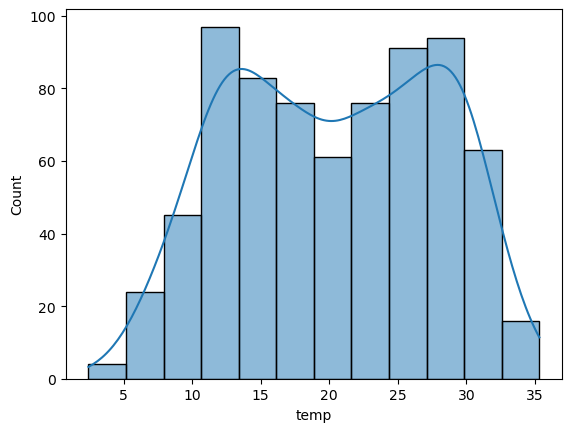

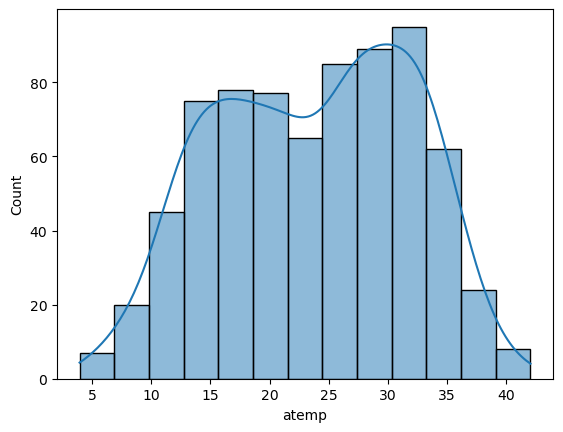

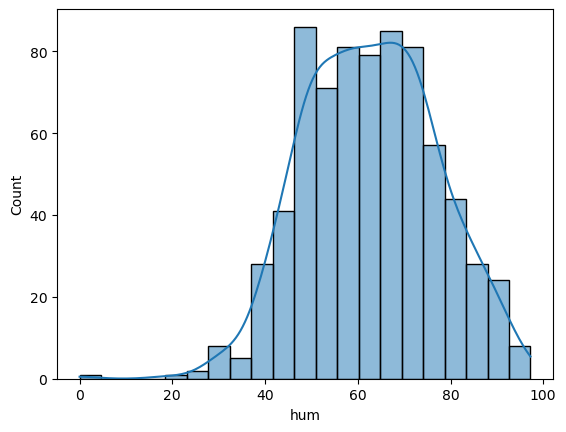

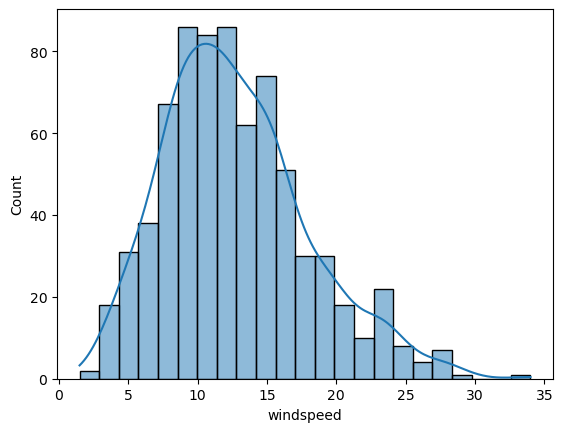

In [426]:
for i in num_cols:
    sns.histplot(x=dfnew[i],kde = True)
    plt.show()

In [427]:
#data appears normally distributed for windspeed and only near normal distribution for other numeric data

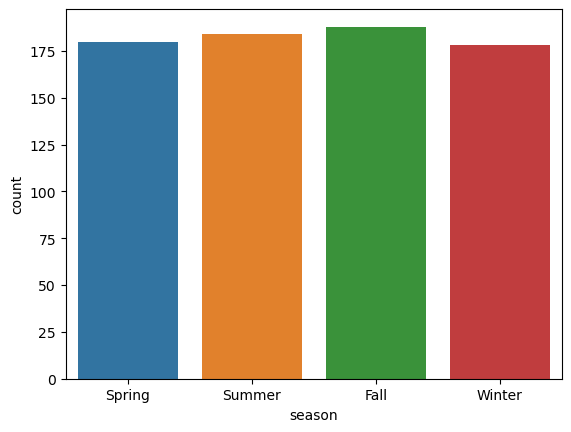

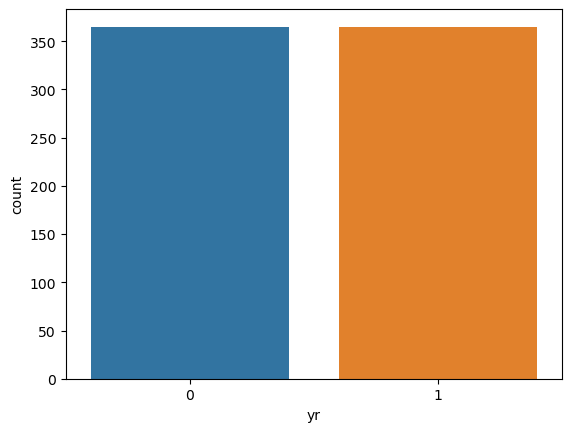

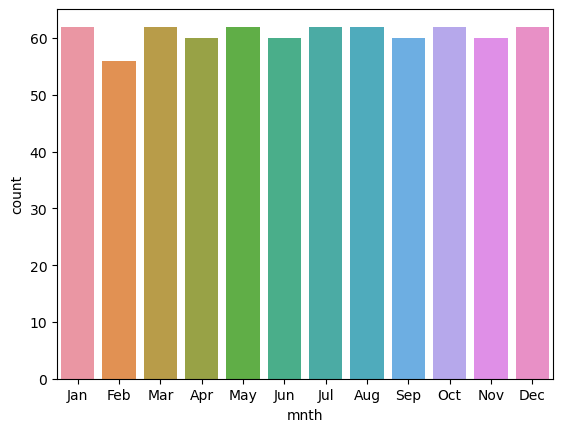

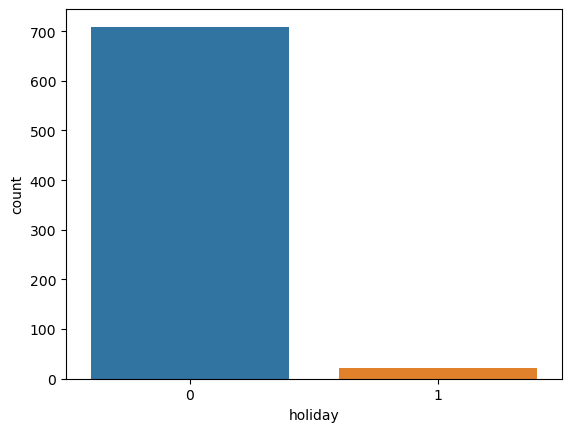

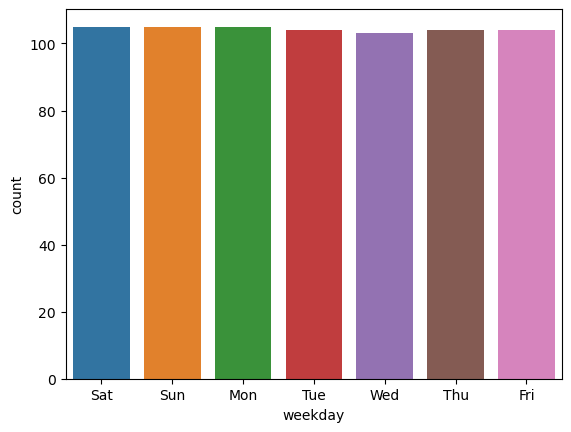

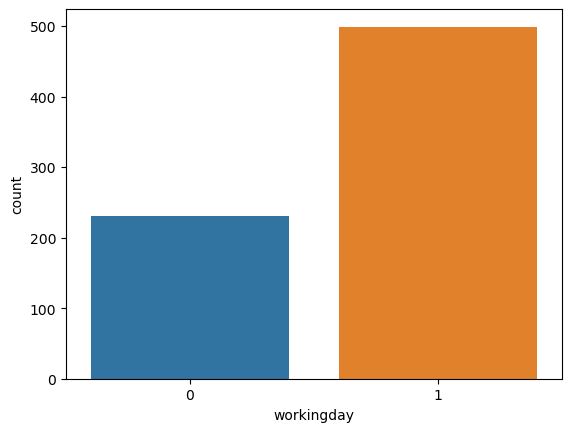

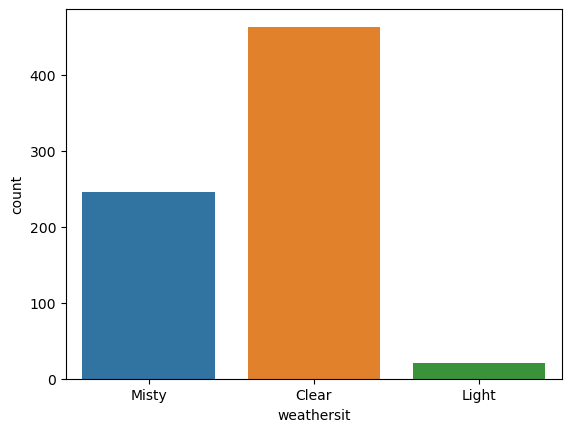

In [428]:
for i in cat_cols:
    sns.countplot(x=dfnew[i])
    plt.show()

In [429]:
#significant influence is seen only in workingday, holiday and weathersit; neglible influence noticed for season and mnth

#### Bivariate analysis

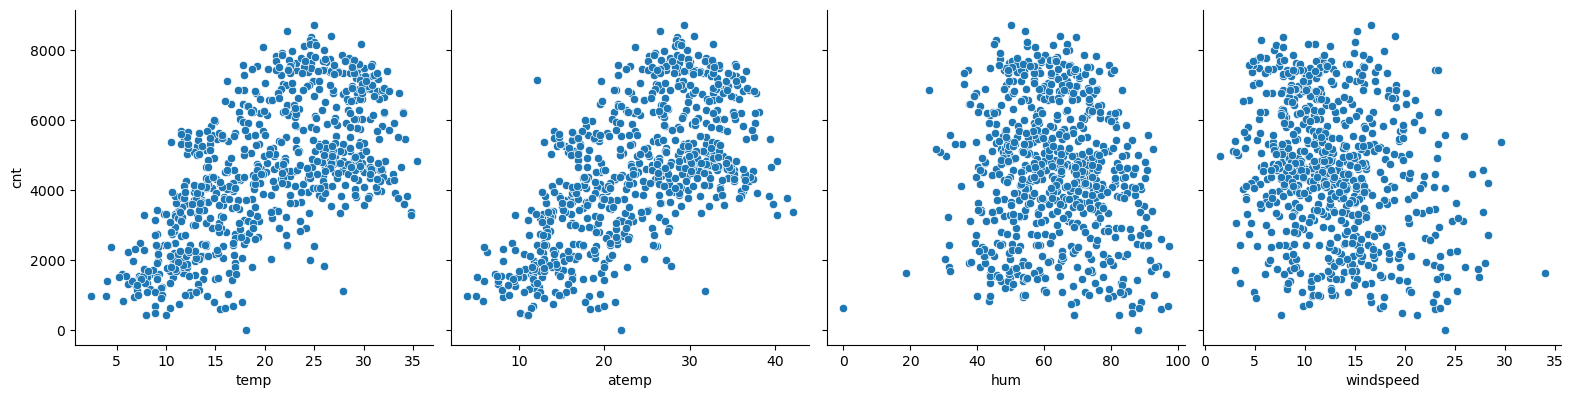

In [430]:
sns.pairplot(dfnew, x_vars=num_cols, y_vars='cnt',size=4, aspect=1, kind='scatter')
plt.show()

In [431]:
#there appears to be some correlation between temp & cnt and atemp and cnt

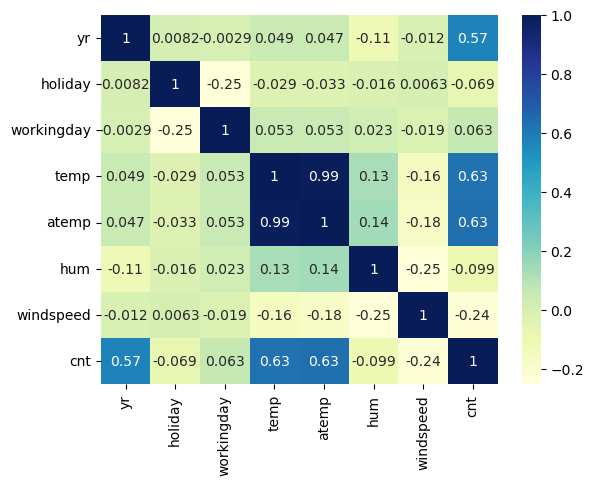

In [432]:
sns.heatmap(dfnew.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [433]:
#relateively strong positive correlation of temp and atemp on cnt

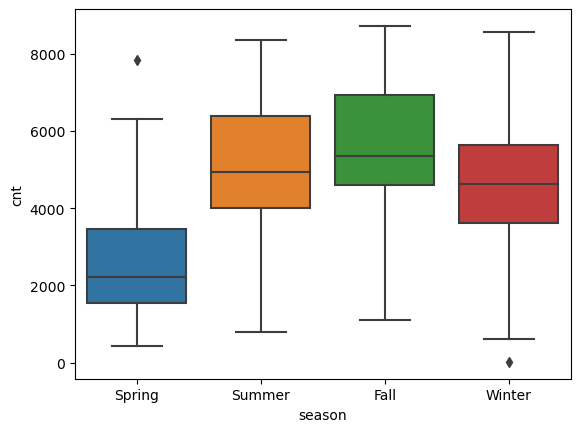

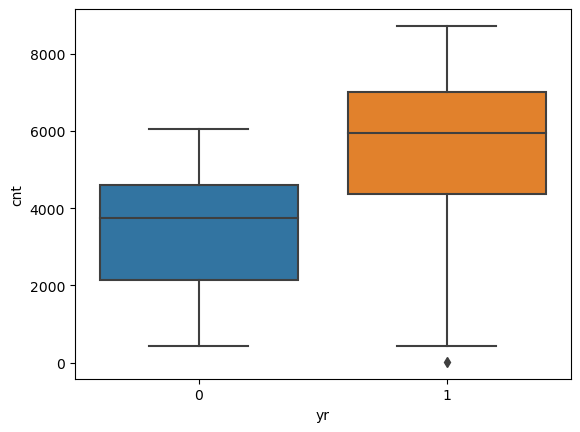

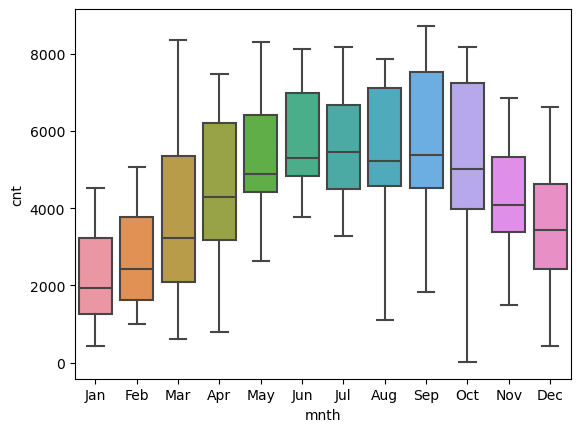

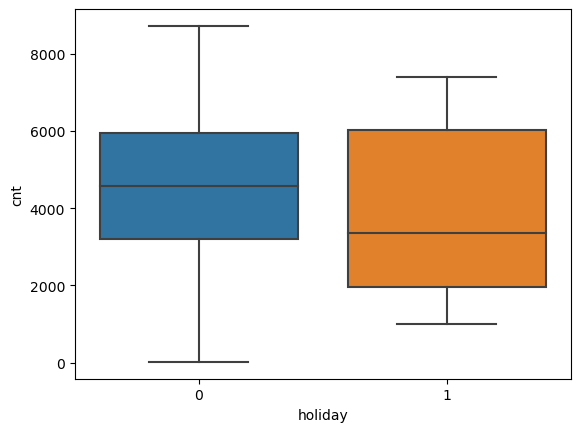

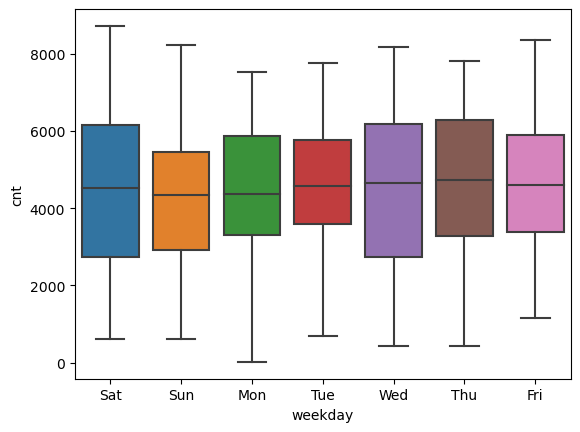

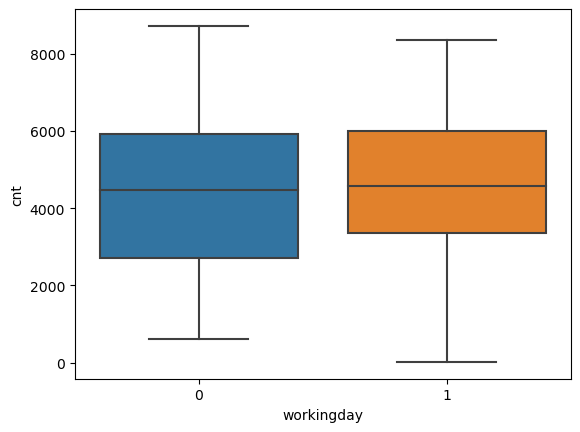

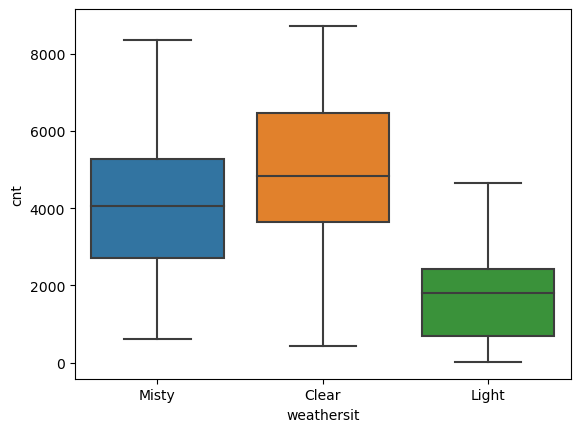

In [434]:
for i in cat_cols:
    sns.boxplot(x=dfnew[i],y=df["cnt"])
    plt.show()

In [435]:
#higher influence of mid year seasons - 
#  corroborated by higher sales during summer and fall with the higer sales between may to oct
#Higher sales during clear weather conditions

### Data Preparation

##### Creating Dummy variables

In [436]:
#create dummy variable only for categories with more than 2 levels

In [437]:
dum_mnth=pd.get_dummies(dfnew.mnth,drop_first=True)
dum_weekday=pd.get_dummies(dfnew.weekday,drop_first=True)
dum_weathersit=pd.get_dummies(dfnew.weathersit,drop_first=True)
dum_season=pd.get_dummies(dfnew.season,drop_first=True)

In [438]:
#concatenating with the dataframe

In [439]:
dfnew=pd.concat([dum_mnth,dum_weekday,dum_weathersit,dum_season,dfnew],axis=1)
dfnew.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [440]:
dfnew.columns

Index(['Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Light', 'Misty',
       'Spring', 'Summer', 'Winter', 'season', 'yr', 'mnth', 'holiday',
       'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt'],
      dtype='object')

In [441]:
#dropping cols after creating dummies for them

In [442]:
dfnew.drop(['mnth', 'weekday', 'weathersit', 'season'], axis = 1, inplace = True)

In [443]:
dfnew.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Summer,Winter,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


### Preparing Model

##### Splitting into training and test data

In [444]:
# We specify this so that the train and test data set always have the same rows, respectively

In [445]:
np.random.seed(0)

In [446]:
#Splitting

In [447]:
dfnew_train, dfnew_test = train_test_split(dfnew, train_size = 0.7, test_size = 0.3, random_state = 100)

In [448]:
dfnew_train.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Summer,Winter,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,1,19.201653,23.0423,55.8333,12.208807,7534
576,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,29.246653,33.1448,70.4167,11.083475,7216
426,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,16.980847,20.6746,62.1250,10.792293,4066
728,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,10.489153,11.5850,48.3333,23.500518,1796
482,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,15.443347,18.8752,48.9583,8.708325,4220


In [449]:
dfnew_train.shape

(510, 30)

##### Using MinMaxScaler for scaling training data

In [450]:
scaler = MinMaxScaler() #instantiate

In [451]:
# Apply scaler() to all the numeric columns except dummy variables

In [452]:
scaler_num_cols = ['temp', 'atemp', 'hum', 'windspeed','cnt']

In [453]:
dfnew_train[scaler_num_cols] = scaler.fit_transform(dfnew_train[scaler_num_cols])

In [454]:
dfnew_train.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Summer,Winter,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [455]:
dfnew_train.describe()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Summer,Winter,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,...,0.245098,0.24902,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,...,0.430568,0.43287,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [456]:
# Let's check the correlation coefficients to see which variables are highly correlated

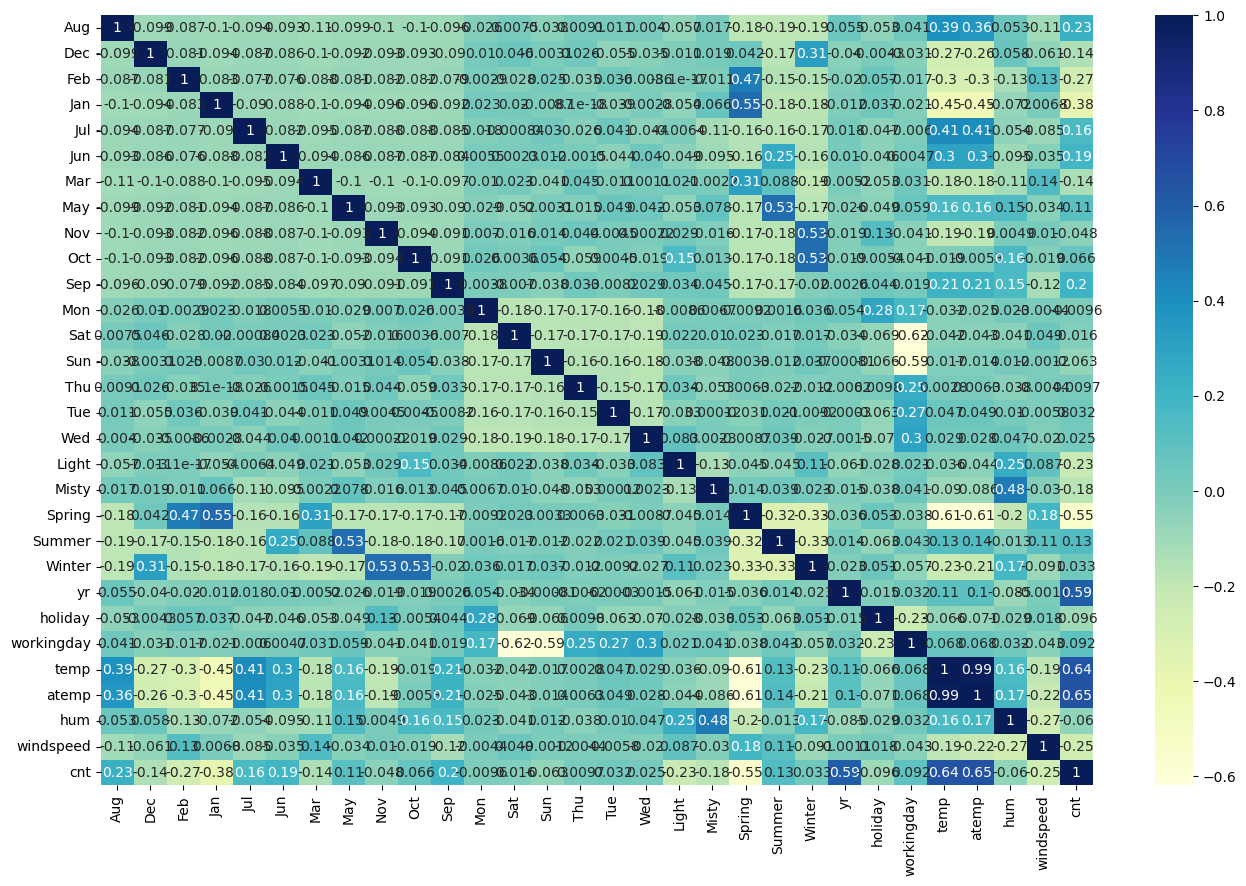

In [457]:
plt.figure(figsize = (16, 10))
sns.heatmap(dfnew_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [458]:
#while there is multicolinearity amongst the variables, temp and atemp appear to have strong correlation with cnt
#observed in scatter plot as well

##### Create  X and Y sets for model building

In [459]:
y_train = dfnew_train.pop('cnt')
X_train = dfnew_train

In [460]:
#number of variables more than 15; using RFE first 

#### Recursive Feature Elimination

In [461]:
lm = LinearRegression()
lm.fit(X_train, y_train)



LinearRegression()

In [462]:
#running RFE for 20 features first
rfe = RFE(lm, step = 20) 
rfe = rfe.fit(X_train, y_train)

In [463]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 2),
 ('Dec', False, 2),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', False, 2),
 ('Jun', False, 2),
 ('Mar', False, 2),
 ('May', False, 2),
 ('Nov', False, 2),
 ('Oct', False, 2),
 ('Sep', True, 1),
 ('Mon', False, 2),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 2),
 ('Tue', False, 2),
 ('Wed', False, 2),
 ('Light', True, 1),
 ('Misty', True, 1),
 ('Spring', False, 2),
 ('Summer', False, 2),
 ('Winter', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [464]:
col = X_train.columns[rfe.support_] #True
col

Index(['Jan', 'Sep', 'Sat', 'Sun', 'Light', 'Misty', 'Winter', 'yr', 'holiday',
       'workingday', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [465]:
X_train.columns[~rfe.support_] #False

Index(['Aug', 'Dec', 'Feb', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Mon',
       'Thu', 'Tue', 'Wed', 'Spring', 'Summer'],
      dtype='object')

In [466]:
# Using cols that are True
X_train_rfe = X_train[col]

#### Building model using statsmodel, for the detailed statistics 

In [467]:
# Adding a constant  
X_train_rfe = sm.add_constant(X_train_rfe)

##### Model 1 

In [468]:
lm1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [469]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          2.39e-178
Time:                        22:09:38   Log-Likelihood:                 483.39
No. Observations:                 510   AIC:                            -938.8
Df Residuals:                     496   BIC:                            -879.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1811      0.024      7.467      0.0

##### VIF Check 

In [470]:
# Calculate the VIFs for the model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Sat,inf
4,Sun,inf
9,holiday,inf
10,workingday,inf
12,atemp,51.66
11,temp,51.39
13,hum,1.88
6,Misty,1.56
1,Jan,1.44
7,Winter,1.30


In [471]:
#atemp has highest p-value; dropping it first

#### Model 2

In [472]:
#dropping atemp

In [473]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [474]:
# Adding a constant  
X_train_new = sm.add_constant(X_train_new)

In [475]:
lm2 = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

In [476]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     195.4
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          2.20e-179
Time:                        22:09:38   Log-Likelihood:                 483.11
No. Observations:                 510   AIC:                            -940.2
Df Residuals:                     497   BIC:                            -885.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1823      0.024      7.537      0.0

##### VIF Check

In [477]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Sat,inf
4,Sun,inf
9,holiday,inf
10,workingday,inf
12,hum,1.87
11,temp,1.71
6,Misty,1.56
1,Jan,1.44
7,Winter,1.29
5,Light,1.24


In [478]:
#pvalue high for holiday

#### Model 3 

In [479]:
X_train_new = X_train_new.drop(["holiday"], axis = 1)

In [480]:
# Add a constant
X_train_new = sm.add_constant(X_train_new)

In [481]:
lm3 = sm.OLS(y_train,X_train_new).fit() 

In [482]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     195.4
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          2.20e-179
Time:                        22:09:39   Log-Likelihood:                 483.11
No. Observations:                 510   AIC:                            -940.2
Df Residuals:                     497   BIC:                            -885.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1556      0.039      3.956      0.0

##### VIF Check 

In [483]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,87.39
9,workingday,9.05
3,Sat,6.05
4,Sun,5.73
11,hum,1.87
10,temp,1.71
6,Misty,1.56
1,Jan,1.44
7,Winter,1.29
5,Light,1.24


In [484]:
#'Sun' has pvalue on higher side; dropping it

#### Model 4 

In [485]:
X_train_new = X_train_new.drop(["Sun"], axis = 1)

In [486]:
# Add a constant
X_train_new = sm.add_constant(X_train_new)

In [487]:
lm4 = sm.OLS(y_train,X_train_new).fit() 

In [488]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     211.1
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.54e-179
Time:                        22:09:40   Log-Likelihood:                 480.69
No. Observations:                 510   AIC:                            -937.4
Df Residuals:                     498   BIC:                            -886.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2075      0.031      6.600      0.0

##### VIF Check 

In [489]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,55.35
10,hum,1.87
9,temp,1.71
8,workingday,1.65
3,Sat,1.64
5,Misty,1.56
1,Jan,1.44
6,Winter,1.29
4,Light,1.24
11,windspeed,1.19


<pre>
Pvalues are minimal and VIF is also less than 5 for the features (no multicolinearity);
F-stat value is 211.1, which is significantly high

<pre>
****considering Model 4 as the final model for now*****


In [490]:
lm4.params

const         0.207455
Jan          -0.077871
Sep           0.074450
Sat           0.064373
Light        -0.254779
Misty        -0.053681
Winter        0.096517
yr            0.231452
workingday    0.055762
temp          0.533595
hum          -0.132436
windspeed    -0.177242
dtype: float64

<pre>
Considering Null Hypothesis H0=Coefficient(s)=0

None of the coefficients are 0. Hence we reject null hypothesis

Linear regression equation is: 

cnt=0.207455-0.077871*Jan+0.074450*Sep+0.064373*Sat-0.254779*Light-0.053681*Misty+0.096517*Winter+0.231452*yr+0.055762*workingday+0.533595*temp-0.132436*hum-0.177242*windspeed

#### Residual Analysis of the train data 

In [491]:
y_train_pred = lm4.predict(X_train_new)

Text(0.5, 0, 'Errors')

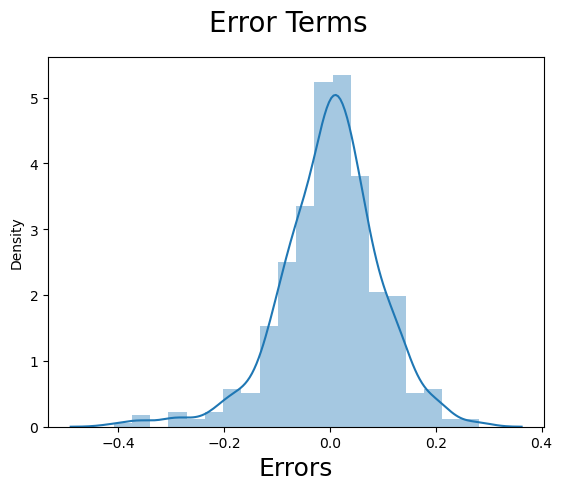

In [492]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train-y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)    

<pre>
The residuals are normally distributed and have a mean near 0

#### Making Predictions 

##### Applying the scaling on the test sets 

In [493]:
#scaling numeric cols; transform only for the test data set

In [494]:
dfnew_test[scaler_num_cols] = scaler.transform(dfnew_test[scaler_num_cols])

In [495]:
dfnew_test.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Summer,Winter,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029


In [496]:
dfnew_test.describe()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Summer,Winter,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,...,0.264840,0.232877,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,...,0.442259,0.423633,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


#### Splitting into X_test and y_test 

In [497]:
y_test = dfnew_test.pop('cnt')
X_test = dfnew_test

In [498]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Aug         219 non-null    uint8  
 1   Dec         219 non-null    uint8  
 2   Feb         219 non-null    uint8  
 3   Jan         219 non-null    uint8  
 4   Jul         219 non-null    uint8  
 5   Jun         219 non-null    uint8  
 6   Mar         219 non-null    uint8  
 7   May         219 non-null    uint8  
 8   Nov         219 non-null    uint8  
 9   Oct         219 non-null    uint8  
 10  Sep         219 non-null    uint8  
 11  Mon         219 non-null    uint8  
 12  Sat         219 non-null    uint8  
 13  Sun         219 non-null    uint8  
 14  Thu         219 non-null    uint8  
 15  Tue         219 non-null    uint8  
 16  Wed         219 non-null    uint8  
 17  Light       219 non-null    uint8  
 18  Misty       219 non-null    uint8  
 19  Spring      219 non-null    

In [499]:
X_train_new.columns

Index(['const', 'Jan', 'Sep', 'Sat', 'Light', 'Misty', 'Winter', 'yr',
       'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [502]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [500]:
#using columns from the last model for the test data

In [503]:
X_test=X_test[X_train_new.columns]

In [504]:
# Adding constant 
X_test_new = sm.add_constant(X_test)
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       219 non-null    float64
 1   Jan         219 non-null    uint8  
 2   Sep         219 non-null    uint8  
 3   Sat         219 non-null    uint8  
 4   Light       219 non-null    uint8  
 5   Misty       219 non-null    uint8  
 6   Winter      219 non-null    uint8  
 7   yr          219 non-null    int64  
 8   workingday  219 non-null    int64  
 9   temp        219 non-null    float64
 10  hum         219 non-null    float64
 11  windspeed   219 non-null    float64
dtypes: float64(4), int64(2), uint8(6)
memory usage: 13.3 KB


In [505]:
# Making predictions using the final model

y_pred = lm4.predict(X_test_new)

#### Evaluating the model

Text(0, 0.5, 'y_pred')

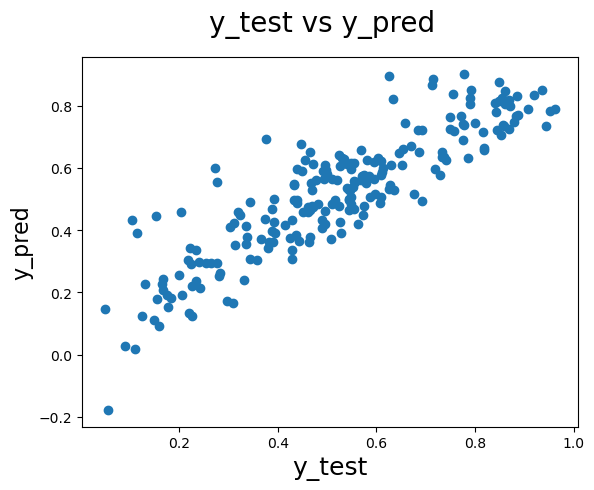

In [506]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [ ]:
#the predictions based on 

In [513]:
r2=r2_score(y_test, y_pred)
r2

0.7785446976957286

In [509]:
# n is number of rows in test dataset
n = X_test.shape[0]

In [510]:
# Number of features 
p = X_test.shape[1]

In [514]:
#adjusted R-Square
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7667765415346322

<pre>
Train data set
R-Square: 82.3%
Adjusted R-Square: 82.0%

<pre>
Test data set
R-Square: 77.85%
Adjusted R-Square: 76.67%

<pre>
While there is slight difference between the R-Square and adjusted R-Square values of training and test data set, the difference is not significant. Hence the model can be considered for applying on other similar datasets.